In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model  import LogisticRegression
from sklearn import tree
from sklearn.ensemble  import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,precision_score,r2_score,mean_squared_error

In [2]:
df=pd.read_csv('US_Accidents_Dec20_updated.csv')

In [ ]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

# Data Preprocessing

In [ ]:
print("Number of rows:", len(df.index))
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(df.index))

Number of rows: 1516064
Number of rows after drop of duplicates: 1516064


In [ ]:
#check all unique weather condition values
unique_weather = df["Weather_Condition"].unique()

print(len(unique_weather))
print(unique_weather)

117
['Light Rain' 'Overcast' 'Mostly Cloudy' 'Snow' 'Light Snow' 'Cloudy' nan
 'Scattered Clouds' 'Clear' 'Partly Cloudy' 'Light Freezing Drizzle'
 'Light Drizzle' 'Haze' 'Rain' 'Heavy Rain' 'Fair' 'Drizzle' 'Fog'
 'Thunderstorms and Rain' 'Patches of Fog' 'Light Thunderstorms and Rain'
 'Mist' 'Rain Showers' 'Light Rain Showers' 'Heavy Drizzle' 'Smoke'
 'Light Freezing Fog' 'Light Freezing Rain' 'Blowing Snow'
 'Heavy Thunderstorms and Rain' 'Heavy Snow' 'Snow Grains' 'Squalls'
 'Light Fog' 'Shallow Fog' 'Thunderstorm' 'Light Ice Pellets' 'Thunder'
 'Thunder in the Vicinity' 'Fair / Windy' 'Light Rain with Thunder'
 'Heavy Thunderstorms and Snow' 'Light Snow Showers' 'Cloudy / Windy'
 'Ice Pellets' 'N/A Precipitation' 'Light Thunderstorms and Snow'
 'T-Storm' 'Rain / Windy' 'Wintry Mix' 'Partly Cloudy / Windy'
 'Heavy T-Storm' 'Sand' 'Light Rain / Windy' 'Widespread Dust'
 'Mostly Cloudy / Windy' 'Blowing Dust / Windy' 'Blowing Dust'
 'Volcanic Ash' 'Freezing Rain / Windy' 'Small Hail

In [3]:
# grouping weather_condition similar words 
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

print(len(df["Weather_Condition"].unique()))
print(df["Weather_Condition"].unique())

12
['Rain' 'Cloudy' 'Snow' nan 'Clear' 'Fog' 'Thunderstorm' 'Smoke' 'Windy'
 'Hail' 'Sand' 'Tornado']


In [4]:
#check all unique wind_direction  values
print(len(df["Wind_Direction"].unique()))
df['Wind_Direction'].unique()

25


array(['SW', 'Calm', 'WSW', 'WNW', 'West', 'NNW', 'South', 'W', 'NW',
       'North', 'SSE', 'SSW', 'ESE', 'SE', nan, 'East', 'Variable', 'NNE',
       'NE', 'ENE', 'CALM', 'S', 'VAR', 'N', 'E'], dtype=object)

In [5]:
# grouping Wind_Direction similar words 
df.loc[df["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
df.loc[df["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
df.loc[df["Wind_Direction"] == "East", "Wind_Direction"] = "E"
df.loc[df["Wind_Direction"] == "North", "Wind_Direction"] = "N"
df.loc[df["Wind_Direction"] == "South", "Wind_Direction"] = "S"
df.loc[df["Wind_Direction"] == "West", "Wind_Direction"] = "W"

df["Wind_Direction"] = df["Wind_Direction"].map(lambda x : x if len(x) != 3 else x[1:], na_action="ignore")
print(len(df["Wind_Direction"].unique()))
df["Wind_Direction"].unique()

11


array(['SW', 'Calm', 'NW', 'W', 'S', 'N', 'SE', nan, 'E', 'Variable',
       'NE'], dtype=object)

In [6]:
# Display the Missing Values in Data :
print("Data : ")
display(df.isnull().sum())

Data : 


ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44410
Amenity   

In [7]:
#parse dates and times - changing Start_Time,End_Time,Weather_Timestamp column to to Y-m-d H-M-S format
import datetime
df['datetime_start_parsed'] = pd.to_datetime(df['Start_Time'], format="%Y-%m-%d %H:%M:%S")
df['datetime_end_parsed'] = pd.to_datetime(df['End_Time'], format="%Y-%m-%d %H:%M:%S")
df['datetime_weathertime_parsed'] = pd.to_datetime(df['Weather_Timestamp'], format="%Y-%m-%d %H:%M:%S")

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'datetime_start_parsed', 'datetime_end_parsed',
       'datetime_weathertime_parsed'],
      dtype='object')

In [8]:
#categorized variables based on numerical, categoric, and datetime
#description is excluded

numerical = [
       'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)','Number','Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)'
]

categorical = [
    'Severity','Street', 'Side', 'City', 'Zipcode', 'County', 'State','Country','Timezone','Airport_Code','Wind_Direction','Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'
]

datetime = [
        'datetime_start_parsed', 'datetime_end_parsed', 'datetime_weathertime_parsed'
]

In [9]:
#replace space with most common entry
df.Side = df.Side.replace(' ','R')

In [10]:
#remove start/end/weather time (already parsed)  and remove Number which has 65% null values
df = df.drop(['ID','Start_Time','End_Time', 'Weather_Timestamp','Number'], axis=1)

In [11]:
#remove Number from numerical array
numerical.remove('Number')

In [12]:
#replace N/A Precipitation with NaN to be imputed with most frequent
df.Weather_Condition = df.Weather_Condition.replace('N/A Precipitation', np.NaN)

In [13]:
tznullindex = np.array(df[df.Timezone.isna()].index)
tznulllatlng = df.loc[tznullindex, ['Start_Lat','Start_Lng']]

In [14]:
pip install timezonefinder

     |████████████████████████████████| 43.0 MB 1.2 MB/s 


In [15]:
#fill in missing time zones
from timezonefinder import TimezoneFinder
obj = TimezoneFinder()
for i in tznullindex:
    timezone = obj.timezone_at(lng=tznulllatlng.loc[i,'Start_Lng'], lat=tznulllatlng.loc[i,'Start_Lat'])
    df.loc[i,'Timezone'] = timezone

In [ ]:
df['Timezone'].value_counts()

US/Eastern             587961
US/Pacific             564358
US/Central             265204
US/Mountain             96239
America/Los_Angeles      1292
America/New_York          725
America/Denver            204
America/Chicago            68
America/Phoenix            13
Name: Timezone, dtype: int64

In [16]:
def most_occur(x):
    if(x.name in ['Timezone']):
        return x.fillna(x.value_counts().index[0])
    else:
        return x

df=df.apply(most_occur)

In [17]:
def preprocess_timezone(x):
    ans=x.split('/')[1][0]
    #print('here')
    return ans

df['Timezone']=df['Timezone'].apply(preprocess_timezone)

In [ ]:
df['Timezone']

0          E
1          E
2          E
3          E
4          E
          ..
1516059    P
1516060    P
1516061    P
1516062    P
1516063    P
Name: Timezone, Length: 1516064, dtype: object

In [ ]:
print('{}: {} ({}%)'.format('Timezone',pd.isnull(df['Timezone']).sum(),(pd.isnull(df['Timezone']).sum()/len(df))*100))

Timezone: 0 (0.0%)


In [18]:
#determine index then lat/lng for missing city, zipcode, and timezone data
citynullindex = np.array(df[df.City.isna()].index)
citynulllatlng = df.loc[citynullindex, ['Start_Lat','Start_Lng']]

zipnullindex = np.array(df[df.Zipcode.isna()].index)
zipnulllatlng = df.loc[zipnullindex, ['Start_Lat','Start_Lng']]

acnullindex = np.array(df[df.Airport_Code.isna()].index)

tznullindex = np.array(df[df.Timezone.isna()].index)
tznulllatlng = df.loc[tznullindex, ['Start_Lat','Start_Lng']]

In [19]:
pip install geopy

In [20]:
#initialize Nominatim for finding missing cities and zipcodes based on lat/lng
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [21]:
#fill in missing cities
for i in citynullindex:
    location = geolocator.reverse(citynulllatlng.loc[i,'Start_Lat'].astype('str')+","+citynulllatlng.loc[i,'Start_Lng'].astype('str'))
    address = location.raw['address']
    city = address.get('city', '')
    df.loc[i,'City'] = city
    
#fill in missing zipcodes
for i in zipnullindex:
    location = geolocator.reverse(zipnulllatlng.loc[i,'Start_Lat'].astype('str')+","+zipnulllatlng.loc[i,'Start_Lng'].astype('str'))
    address = location.raw['address']
    zipcode = address.get('postcode')
    df.loc[i,'Zipcode'] = zipcode
    #if cannot locate zipcode with geolocator, fill in zipcode mode for the state
    if zipcode == None:
        df.loc[i,'Zipcode'] = df[df['State'] == df.loc[i,'State']]['Zipcode'].mode(dropna=True)[0]

In [22]:
#make all zipcodes 5 digit                           
zipcodes = pd.DataFrame(df[[not a for a in df['Zipcode'].isna()]]['Zipcode'].str[:5])
zipindex = np.array(df[df.Zipcode.notnull()].index)
df.loc[zipindex,'Zipcode'] = zipcodes.loc[:,'Zipcode']

In [23]:
#replace missing airport_code data with most common airport_code for each state
ac_states = pd.DataFrame(df.loc[acnullindex,'State'].unique(), columns=['State'])
for i in range(0,len(ac_states)):
    ac_states.loc[i,'Mode'] = df[df.State == ac_states.loc[i,'State']]['Airport_Code'].mode(dropna=True)[0]
for i in acnullindex:
    df.loc[i,'Airport_Code'] = ac_states[ac_states['State'] == df.loc[i,'State']]['Mode'].tolist()[0]

In [24]:
#replace missing wind chill data with temperature
wcnull = np.array(df[np.isnan(df['Wind_Chill(F)'])].index)
df.loc[wcnull,'Wind_Chill(F)'] = df.loc[i,'Temperature(F)']

In [25]:
#replace missing temperature data with wind chill
tempnull = np.array(df[np.isnan(df['Temperature(F)'])].index)
df.loc[wcnull,'Temperature(F)'] = df.loc[i,'Wind_Chill(F)']

In [26]:
#replace missing data for when the weather was collected based on end time of the accident
weathertimenull = np.array(df[np.isnan(df.datetime_weathertime_parsed)].index)
df.loc[weathertimenull,'datetime_weathertime_parsed'] = df.loc[weathertimenull,'datetime_end_parsed']

In [27]:
#variables to impute with median or mode strategy
median_impute = ['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']
mode_impute = ['Wind_Direction','Weather_Condition','Sunrise_Sunset','Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight']

In [28]:
#mode impute (SimpleImputer for loop is too slow)
wdnull = np.array(df[df.Wind_Direction.isna()].index)
df.loc[wdnull,'Wind_Direction'] = 'CALM'

wcnull = np.array(df[df.Weather_Condition.isna()].index)
df.loc[wcnull,'Weather_Condition'] = 'Fair'

ssnull = np.array(df[df.Sunrise_Sunset.isna()].index)
df.loc[ssnull,'Sunrise_Sunset'] = 'Day'

ctnull = np.array(df[df.Civil_Twilight.isna()].index)
df.loc[ssnull,'Civil_Twilight'] = 'Day'

ntnull = np.array(df[df.Nautical_Twilight.isna()].index)
df.loc[ssnull,'Nautical_Twilight'] = 'Day'

atnull = np.array(df[df.Astronomical_Twilight.isna()].index)
df.loc[atnull,'Astronomical_Twilight'] = 'Day'

In [29]:
#impute variables with median values
import numpy as np
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(missing_values=np.nan, strategy='median')
df_median_fit = imputer1.fit_transform(df[median_impute])
df_median = imputer1.transform(df_median_fit)

df[median_impute] = pd.DataFrame(df_median)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  "X does not have valid feature names, but"


In [30]:
#print number and percentage of null entries per variable
print('Null values per variable')
for column in df.columns:
    print('{}: {} ({}%)'.format(column,pd.isnull(df[column]).sum(),(pd.isnull(df[column]).sum()/len(df))*100))

Null values per variable
Severity: 0 (0.0%)
Start_Lat: 0 (0.0%)
Start_Lng: 0 (0.0%)
End_Lat: 0 (0.0%)
End_Lng: 0 (0.0%)
Distance(mi): 0 (0.0%)
Description: 0 (0.0%)
Street: 0 (0.0%)
Side: 0 (0.0%)
City: 0 (0.0%)
County: 0 (0.0%)
State: 0 (0.0%)
Zipcode: 0 (0.0%)
Country: 0 (0.0%)
Timezone: 0 (0.0%)
Airport_Code: 0 (0.0%)
Temperature(F): 0 (0.0%)
Wind_Chill(F): 0 (0.0%)
Humidity(%): 0 (0.0%)
Pressure(in): 0 (0.0%)
Visibility(mi): 0 (0.0%)
Wind_Direction: 0 (0.0%)
Wind_Speed(mph): 0 (0.0%)
Precipitation(in): 0 (0.0%)
Weather_Condition: 0 (0.0%)
Amenity: 0 (0.0%)
Bump: 0 (0.0%)
Crossing: 0 (0.0%)
Give_Way: 0 (0.0%)
Junction: 0 (0.0%)
No_Exit: 0 (0.0%)
Railway: 0 (0.0%)
Roundabout: 0 (0.0%)
Station: 0 (0.0%)
Stop: 0 (0.0%)
Traffic_Calming: 0 (0.0%)
Traffic_Signal: 0 (0.0%)
Turning_Loop: 0 (0.0%)
Sunrise_Sunset: 0 (0.0%)
Civil_Twilight: 0 (0.0%)
Nautical_Twilight: 0 (0.0%)
Astronomical_Twilight: 0 (0.0%)
datetime_start_parsed: 0 (0.0%)
datetime_end_parsed: 0 (0.0%)
datetime_weathertime_pars

In [31]:
#seperate variables with dates and times into seperate columns
for col in datetime:
    df['{} day'.format(col)] = df[col].dt.day
    df['{} month'.format(col)] = df[col].dt.month
    df['{} year'.format(col)] = df[col].dt.year
    df['{} hour'.format(col)] = df[col].dt.hour
    df['{} minute'.format(col)] = df[col].dt.minute
    df['{} second'.format(col)] = df[col].dt.second
    numerical.append('{} day'.format(col))
    numerical.append('{} month'.format(col))
    numerical.append('{} year'.format(col))
    numerical.append('{} hour'.format(col))
    numerical.append('{} minute'.format(col))
    numerical.append('{} second'.format(col))

#remove datetime columns from dataframe     
df = df.drop(datetime, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516064 entries, 0 to 1516063
Data columns (total 60 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Severity                            1516064 non-null  int64  
 1   Start_Lat                           1516064 non-null  float64
 2   Start_Lng                           1516064 non-null  float64
 3   End_Lat                             1516064 non-null  float64
 4   End_Lng                             1516064 non-null  float64
 5   Distance(mi)                        1516064 non-null  float64
 6   Description                         1516064 non-null  object 
 7   Street                              1516064 non-null  object 
 8   Side                                1516064 non-null  object 
 9   City                                1516064 non-null  object 
 10  County                              1516064 non-null  object 
 11  State      

In [32]:
cat_col_selected=[]
for i in categorical:
    x=df[i].value_counts()
    if(len(x)<=6):
        cat_col_selected.append(i)

In [33]:
cat_col_selected.remove('Country')

In [ ]:
cat_col_selected

['Severity',
 'Side',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [34]:
cont_cols=list(df.select_dtypes(['int64','float64']).columns)

In [35]:
#nan_cols=df[cont_cols].isna().any()
#cols_nan=df.columns[nan_cols].tolist()

def fill_avg(x):
    if(x.name in cont_cols):
        return x.fillna(x.mean())
    else:
        return x

In [36]:
df1=df.apply(fill_avg)

In [37]:
COLS=cont_cols+cat_col_selected
df1=df1[COLS]

In [38]:
c_col=list(df1.select_dtypes(['bool','object']).columns)

def most_occur(x):
    if(x.name in c_col):
        return x.fillna(x.value_counts().index[0])
    else:
        return x

df1=df1.apply(most_occur)

In [ ]:
df1.shape

(1516064, 50)

In [ ]:
df1.head(5)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,40.10891,-83.09286,40.11206,-83.03187,3.230,42.1,36.1,58.0,29.76,...,False,False,False,False,False,False,Night,Night,Night,Night
1,2,39.86542,-84.06280,39.86501,-84.04873,0.747,57.0,57.0,91.0,29.68,...,False,False,False,False,False,False,Night,Night,Night,Night
2,2,39.10266,-84.52468,39.10209,-84.52396,0.055,57.0,57.0,97.0,29.70,...,False,False,False,False,False,False,Night,Night,Night,Day
3,2,39.10148,-84.52341,39.09841,-84.52241,0.219,57.0,57.0,97.0,29.70,...,False,False,False,False,False,False,Night,Night,Night,Day
4,2,41.06213,-81.53784,41.06217,-81.53547,0.123,57.0,57.0,55.0,29.65,...,False,False,False,False,False,False,Night,Night,Day,Day


In [39]:
df1[c_col]=df1[c_col].apply(lambda x: pd.factorize(x)[0])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516064 entries, 0 to 1516063
Data columns (total 50 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Severity                            1516064 non-null  int64  
 1   Start_Lat                           1516064 non-null  float64
 2   Start_Lng                           1516064 non-null  float64
 3   End_Lat                             1516064 non-null  float64
 4   End_Lng                             1516064 non-null  float64
 5   Distance(mi)                        1516064 non-null  float64
 6   Temperature(F)                      1516064 non-null  float64
 7   Wind_Chill(F)                       1516064 non-null  float64
 8   Humidity(%)                         1516064 non-null  float64
 9   Pressure(in)                        1516064 non-null  float64
 10  Visibility(mi)                      1516064 non-null  float64
 11  Wind_Speed(

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1.iloc[:,1:],df1.iloc[:,0],test_size=0.2,random_state=2)

In [41]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1212851, 49), (303213, 49), (1212851,), (303213,))

# Models for severity

1.  Random Forest Regressor

In [ ]:
# Random Forest Regressor

In [42]:
x = df1.loc[:,df1.columns!='Severity']
y = df1.iloc[:,0]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [43]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1212851, 48), (303213, 48), (1212851,), (303213,))

In [44]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=10, random_state=0)
# regr.fit(X_train,y_train)
# fit the regressor with x and y data
regr.fit(X_train,y_train)
# ypred = regr.predict(X_test)

RandomForestRegressor(n_estimators=10, random_state=0)

In [45]:
Y_pred = regr.predict(X_test)  # test the output by changing values

In [46]:
print("r2 score for severity:" , r2_score(y_test,Y_pred))

r2 score for severity: 0.47313846865373976


In [47]:
print("mean squared error for severity: " , mean_squared_error(y_test,Y_pred))

mean squared error for severity:  0.19598096439965837


In [124]:
num_iter = [5, 10, 15, 20]
x = [];
y = [];
for i in num_iter:
    regr = RandomForestRegressor(n_estimators=i, random_state=0)
    regr.fit(X_train,y_train)
    Y_pred = regr.predict(X_test)
    y.append(mean_squared_error(y_test,Y_pred))
    x.append(i)

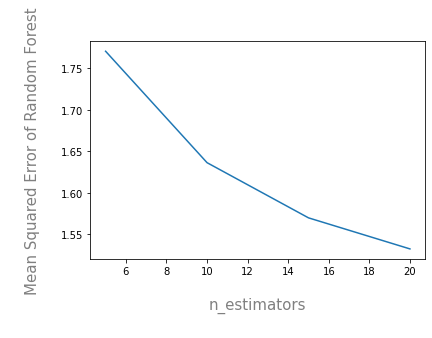

In [125]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.ylabel('\nMean Squared Error of Random Forest\n', fontsize=15, color='grey')
plt.xlabel('\nn_estimators\n', fontsize=15, color='grey')
plt.show()

In [56]:
num_iter = [5, 10, 15, 20]
x = [];
y = [];
for i in num_iter:
    regr = RandomForestRegressor(n_estimators=i, random_state=0)
    regr.fit(X_train,y_train)
    Y_pred = regr.predict(X_test)
    y.append(r2_score(y_test,Y_pred))
    x.append(i)

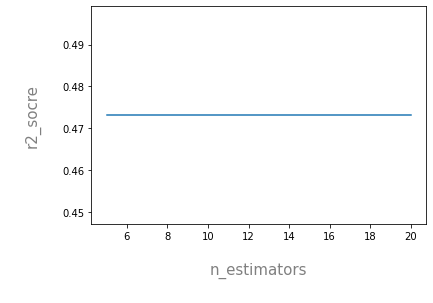

In [57]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.ylabel('\nr2_socre of Random Forest\n', fontsize=15, color='grey')
plt.xlabel('\nn_estimators\n', fontsize=15, color='grey')
plt.show()

2. Decision Tree

In [60]:
from sklearn.metrics import r2_score,mean_squared_error
tree_reg = tree.DecisionTreeRegressor(min_samples_split = 10)
tree_reg = tree_reg.fit(X_train,y_train)
ypred_tree   = tree_reg.predict(X_test)

In [61]:
print("r2 score for severity:" , r2_score(y_test,ypred_tree))

r2 score for severity: 0.18803403992345213


In [62]:
print("mean squared error for severity: " , mean_squared_error(y_test,ypred_tree))

mean squared error for severity:  0.30203357513857687


In [122]:
num_iter = [5, 10, 15, 20]
x = [];
y = [];
for i in num_iter:
    tree_reg = tree.DecisionTreeRegressor(min_samples_split = i)
    tree_reg = tree_reg.fit(X_train,y_train)
    ypred_tree   = tree_reg.predict(X_test)
    y.append(mean_squared_error(y_test,ypred_tree))
    x.append(i)

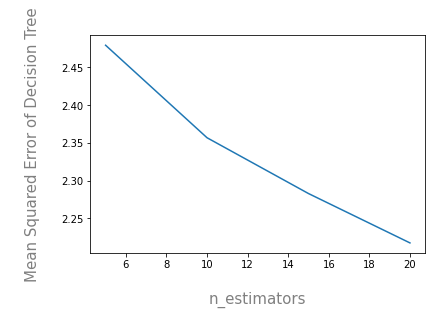

In [123]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.ylabel('\nMean Squared Error of Decision Tree\n', fontsize=15, color='grey')
plt.xlabel('\nn_estimators\n', fontsize=15, color='grey')
plt.show()

In [117]:
num_iter = [5, 10, 15, 20]
x = [];
y = [];
for i in num_iter:
    tree_reg = tree.DecisionTreeRegressor(min_samples_split = i)
    tree_reg = tree_reg.fit(X_train,y_train)
    ypred_tree   = tree_reg.predict(X_test)
    y.append(r2_score(y_test,ypred_tree))
    x.append(i)

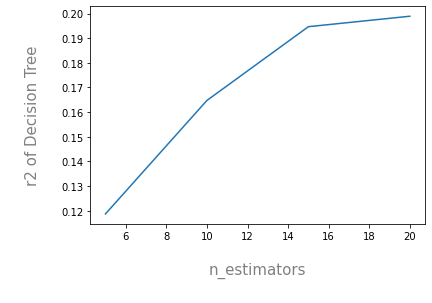

In [120]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.ylabel('\nr2 of Decision Tree\n', fontsize=15, color='grey')
plt.xlabel('\nn_estimators\n', fontsize=15, color='grey')
plt.show()

In [65]:
ypred_tree

array([2., 2., 2., ..., 2., 2., 2.])

In [ ]:
df1.iloc[:,0]

0          3
1          2
2          2
3          2
4          2
          ..
1516059    2
1516060    2
1516061    2
1516062    2
1516063    2
Name: Severity, Length: 1516064, dtype: int64

In [ ]:
df2=df1.iloc[:,1:]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516064 entries, 0 to 1516063
Data columns (total 49 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Start_Lat                           1516064 non-null  float64
 1   Start_Lng                           1516064 non-null  float64
 2   End_Lat                             1516064 non-null  float64
 3   End_Lng                             1516064 non-null  float64
 4   Distance(mi)                        1516064 non-null  float64
 5   Temperature(F)                      1516064 non-null  float64
 6   Wind_Chill(F)                       1516064 non-null  float64
 7   Humidity(%)                         1516064 non-null  float64
 8   Pressure(in)                        1516064 non-null  float64
 9   Visibility(mi)                      1516064 non-null  float64
 10  Wind_Speed(mph)                     1516064 non-null  float64
 11  Precipitati

4. Neural netork

In [66]:
y_nn = df1.iloc[:,0]
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [67]:
encoder = LabelEncoder()
encoder.fit(y_nn)
y_nn = encoder.transform(y_nn)
y_nn = to_categorical(y_nn)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:,1:],y_nn, test_size = 0.3, random_state = 101)

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

In [70]:
model = Sequential()

model.add(Dense(39, activation = 'relu', input_dim = len(df1.columns) - 1))
model.add(Dropout(rate = 0.4))
model.add(Dense(20 , activation = 'relu'))
model.add(Dropout(rate = 0.4))
model.add(Dense(10 , activation = 'relu'))
model.add(Dropout(rate = 0.4))
model.add(Dense(4, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [84]:
def baseline_model():
  model = Sequential()
  model.add(Dense(13, input_dim=49, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
  # Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')

In [82]:
model.fit(X_train, y_train, epochs = 2, callbacks = [early_stop],batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/2
33164/33164 [==============================] - 57s 2ms/step - loss: 0.2037 - val_loss: 0.1875
Epoch 2/2
33164/33164 [==============================] - 65s 2ms/step - loss: 0.1875 - val_loss: 0.1875


In [71]:
model.fit(X_train, y_train, epochs = 2, callbacks = [early_stop],batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/2
33164/33164 [==============================] - 68s 2ms/step - loss: 1.3897 - accuracy: 0.7932 - val_loss: 0.6876 - val_accuracy: 0.7991
Epoch 2/2
33164/33164 [==============================] - 68s 2ms/step - loss: 0.6855 - accuracy: 0.7999 - val_loss: 0.6876 - val_accuracy: 0.7991


In [72]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

14214/14214 [==============================] - 17s 1ms/step - loss: 0.6876 - accuracy: 0.7991

accuracy: 79.91%


In [88]:
y_pred = model.predict(X_test)

# Models for Distance

1.Random Forest

In [90]:
df2=df1.iloc[:,1:]

In [91]:
x1 = df2.loc[:,df2.columns!='Distance(mi)']
y1 = df2.iloc[:,4] 

In [92]:
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=2)

In [93]:
regr = RandomForestRegressor(n_estimators=10, random_state=0)
regr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [94]:
Distance_Random = regr.predict(X_test)  # test the output by changing values

In [95]:
print("r2 score for severity:" , r2_score(y_test,Distance_Random))

r2 score for severity: 0.4171495765197536


In [96]:
print("mean squared error for severity: " , mean_squared_error(y_test,Distance_Random))

mean squared error for severity:  1.6361829799104997


In [97]:
num_iter = [5, 10, 15, 20]
x = [];
y = [];
for i in num_iter:
    regr = RandomForestRegressor(n_estimators=i, random_state=0)
    regr.fit(X_train,y_train)
    Y_pred = regr.predict(X_test)
    y.append(mean_squared_error(y_test,Distance_Random))
    x.append(i)

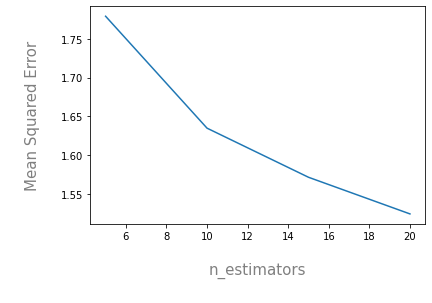

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.ylabel('\nMean Squared Error\n', fontsize=15, color='grey')
plt.xlabel('\nn_estimators\n', fontsize=15, color='grey')
plt.show()

In [99]:
num_iter = [5, 10, 15, 20]
x = [];
y = [];
for i in num_iter:
    
    y.append(r2_score(y_test,Distance_Random))
    x.append(i)

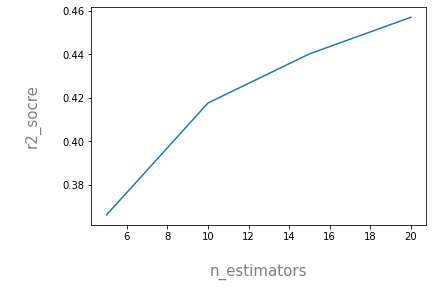

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.ylabel('\nr2_socre\n', fontsize=15, color='grey')
plt.xlabel('\nn_estimators\n', fontsize=15, color='grey')
plt.show()

2. Decision Tree

In [ ]:
# Decision Tree Regressor

In [102]:
from sklearn.metrics import r2_score,mean_squared_error
tree_reg = tree.DecisionTreeRegressor(min_samples_split = 10)
tree_reg = tree_reg.fit(X_train,y_train)
ypred   = tree_reg.predict(X_test)

In [103]:
print("r2 score for distance:" , r2_score(y_test,ypred))

r2 score for distance: 0.15600915208938182


In [104]:
print("mean squared error for distance: " , mean_squared_error(y_test,ypred))

mean squared error for distance:  2.3692587410436805


In [111]:
from sklearn.metrics import r2_score,mean_squared_error
num_iter = [5, 10, 15, 20]
x = [];
y = [];
for i in num_iter:
    tree_reg = tree.DecisionTreeRegressor(min_samples_split = i)
    tree_reg = tree_reg.fit(X_train,y_train)
    ypred   = tree_reg.predict(X_test)
    y.append(r2_score(y_test,ypred))
    x.append(i)

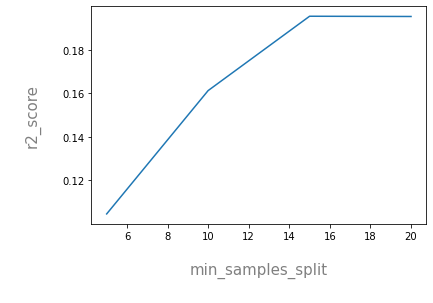

In [112]:
plt.plot(x,y)
plt.ylabel('\nr2_score\n', fontsize=15, color='grey')
plt.xlabel('\nmin_samples_split\n', fontsize=15, color='grey')
plt.show()

In [109]:
from sklearn.metrics import r2_score,mean_squared_error
num_iter = [5, 10, 15, 20]
x = [];
y = [];
for i in num_iter:
    tree_reg = tree.DecisionTreeRegressor(min_samples_split = i)
    tree_reg = tree_reg.fit(X_train,y_train)
    ypred   = tree_reg.predict(X_test)
    y.append(mean_squared_error(y_test,ypred))
    x.append(i)

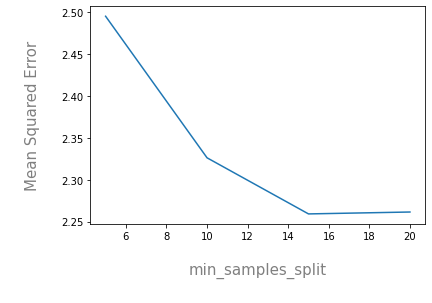

In [110]:
plt.plot(x,y)
plt.ylabel('\nMean Squared Error\n', fontsize=15, color='grey')
plt.xlabel('\nmin_samples_split\n', fontsize=15, color='grey')
plt.show()